# Exploratory Data Analysis - LendingClub Loan Listings Data

Meskerem Goshime

Data Source: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans

“LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.” The company “enables borrowers to create unsecured personal loans between  1,000𝑎𝑛𝑑 40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.” (source: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans?select=lc_2016_2017.csv)​

This study aims to help LendingClub in making informed lending decisions and investors make informed investment decisions

In [70]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#Load data
Loan_0715 = pd.read_csv('Loan_cleaned.csv')
#Loan_1617 = pd.read_csv('Loan_1617_cleaned.csv')

In [72]:
Loan_0715.head(3)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,861.07,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,INDIVIDUAL,0.0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,603.65,0.0,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,INDIVIDUAL,0.0


In [73]:
#Loan_1617.head(3)

In [74]:
# Considering columns for the response variable. Loan_status seems a good candidate, but it is categorical.

# Defining terminologies
    # In Grace period - A grace period is a time period automatically granted on a loan 
    #  during which the borrower does not have to pay the issuer any monies toward the loan, 
    #  and the borrower does not incur any penalties for not paying.
    # Charged off - A charge-off occurs when a lender writes off unpaid debt for tax purposes.

# Loan in good standing - current, fully paid, issued, in grace period
# Loan in bad standing - charged off, late (16-30 days), late (31-120 days), default

# dti - Debt-to-income ratio (DTI) divides the total of all monthly debt payments by gross monthly income

In [75]:
Loan_0715['loan_status'].value_counts()

Current               601779
Fully Paid            209711
Charged Off            46009
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

In [76]:
Loan_0715.shape

#Since the data is very large, I am going to work with the 2007 to 2015 data only.

(887379, 44)

In [77]:
# converting to numeric
# term is categorical

Loan_0715['term'] = Loan_0715['term'].replace(to_replace = " 36 months", value ="36")
Loan_0715['term'] = Loan_0715['term'].replace(to_replace = " 60 months", value ="60")
Loan_0715['term'] = Loan_0715['term'].replace(to_replace = "60 months", value ="60")
Loan_0715['term'] = Loan_0715['term'].replace(to_replace = "36 months", value ="36")
Loan_0715['term'].value_counts()

36    621125
60    266254
Name: term, dtype: int64

In [78]:
Loan_0715['term'] = pd.to_numeric(Loan_0715['term'])

In [79]:
# Converting emp_length to numeric. This column is categorical as it takes few values.
Loan_0715['emp_length'] = Loan_0715['emp_length'].replace(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                                            ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
Loan_0715['emp_length'] = pd.to_numeric(Loan_0715['emp_length'])

In [80]:
Loan_0715['grade'] = Loan_0715['grade'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], [1, 2, 3, 4, 5, 6, 7])
Loan_0715['grade'].value_counts()

2    254535
3    245860
1    148202
4    139542
5     70705
6     23046
7      5489
Name: grade, dtype: int64

In [81]:
# Dropping rows with null values

Loan_0715 = Loan_0715.dropna()

In [82]:
Loan_0715.isna().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

In [83]:
Loan_0715.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825482 entries, 0 to 887378
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          825482 non-null  int64  
 1   loan_amnt                   825482 non-null  float64
 2   funded_amnt                 825482 non-null  float64
 3   funded_amnt_inv             825482 non-null  float64
 4   term                        825482 non-null  int64  
 5   int_rate                    825482 non-null  float64
 6   installment                 825482 non-null  float64
 7   grade                       825482 non-null  int64  
 8   sub_grade                   825482 non-null  object 
 9   emp_length                  825482 non-null  float64
 10  home_ownership              825482 non-null  object 
 11  annual_inc                  825482 non-null  float64
 12  verification_status         825482 non-null  object 
 13  issue_d       

In [84]:
# Choosing the numeric columns to check for correlations

Loan_0715_corr = Loan_0715[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'annual_inc', 
        'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
        'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq']]

In [85]:
Loan_0715_corr.corr()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
loan_amnt,1.000000,0.408105,0.149709,0.944134,0.155832,0.106380,0.326205,0.046469,-0.001885,-0.035108,...,0.481388,0.482442,0.394501,0.541800,0.031466,0.073925,0.052267,0.230415,-0.016375,0.003156
term,0.408105,1.000000,0.433304,0.138958,0.448350,0.068953,0.051867,0.111411,-0.001617,-0.005322,...,0.080466,0.082209,-0.030768,0.387304,0.004381,0.058292,0.036316,0.070348,-0.005175,0.004784
int_rate,0.149709,0.433304,1.000000,0.136518,0.953967,0.010064,-0.072268,0.162611,0.055793,0.228113,...,0.173147,0.174134,0.054691,0.454418,0.057754,0.108739,0.071332,0.102689,0.013540,0.026804
installment,0.944134,0.138958,0.136518,1.000000,0.132519,0.090830,0.320606,0.031326,0.006412,-0.003946,...,0.522720,0.523592,0.455082,0.504912,0.042045,0.074988,0.054078,0.239808,-0.013769,0.005836
grade,0.155832,0.448350,0.953967,0.132519,1.000000,0.005267,-0.063571,0.169300,0.060265,0.216127,...,0.088412,0.086985,-0.023410,0.386923,0.053928,0.093130,0.064704,0.067576,0.019895,0.028240
emp_length,0.106380,0.068953,0.010064,0.090830,0.005267,1.000000,0.064145,0.044093,0.025486,-0.011210,...,0.050858,0.052950,0.037763,0.070302,-0.009514,0.004414,0.002959,0.028677,-0.003864,0.009118
annual_inc,0.326205,0.051867,-0.072268,0.320606,-0.063571,0.064145,1.000000,-0.177764,0.046268,0.035400,...,0.158891,0.158891,0.148058,0.125862,0.012949,0.006723,0.006048,0.088899,-0.003524,0.014737
dti,0.046469,0.111411,0.162611,0.031326,0.169300,0.044093,-0.177764,1.000000,-0.008409,-0.017492,...,-0.080545,-0.078066,-0.103489,0.024637,-0.010809,0.004025,0.005380,-0.057900,-0.000205,0.007177
delinq_2yrs,-0.001885,-0.001617,0.055793,0.006412,0.060265,0.025486,0.046268,-0.008409,1.000000,0.020329,...,-0.033950,-0.033477,-0.040346,0.000546,0.017106,-0.001155,0.000743,-0.020496,0.063029,0.130085
inq_last_6mths,-0.035108,-0.005322,0.228113,-0.003946,0.216127,-0.011210,0.035400,-0.017492,0.020329,1.000000,...,0.078355,0.074424,0.062678,0.086377,0.031270,0.045961,0.034102,0.060395,0.006177,-0.005661


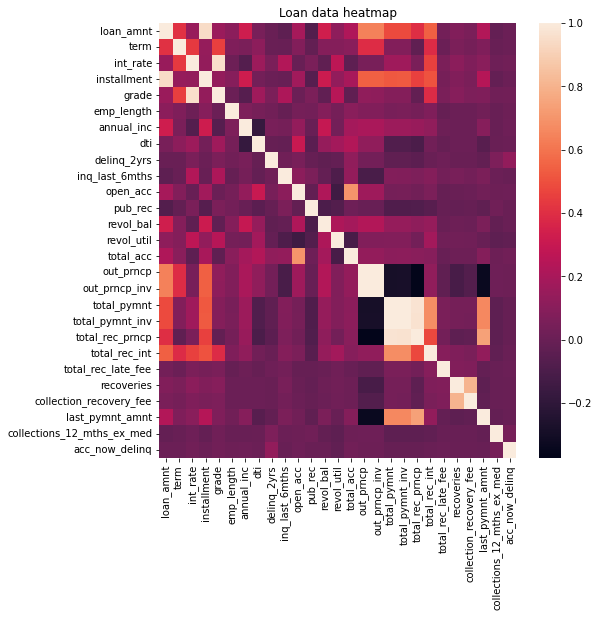

In [86]:
plt.figure(figsize=(8,8))
heat_map = sns.heatmap(Loan_0715_corr.corr())
plt.title( "Loan data heatmap" )
plt.show()

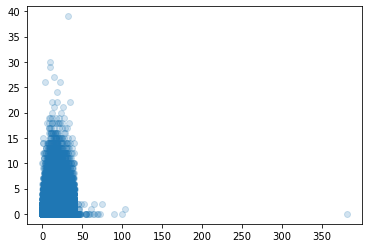

In [87]:
plt.scatter(x='dti', y='delinq_2yrs', data=Loan_0715, alpha=0.2)
plt.show()

In [88]:
print('max dti is ', np.max(Loan_0715.dti))
print('percentiles, 5, 25, 50, 75, and 95 are ', np.percentile(Loan_0715.dti, (5, 25, 50, 75, 95)))

max dti is  380.53
percentiles, 5, 25, 50, 75, and 95 are  [ 5.19 11.86 17.56 23.8  32.55]


In [89]:
#it is hard to see the data pattern with the very large outliers in dti. 
#I am subsetting dti's less than 60 and compare those with delinquency for 2 years.
outliers_removed = Loan_0715[Loan_0715['dti'] < 50]
dti_no_outliers = outliers_removed['dti']
delinq_2yrs_no = outliers_removed['delinq_2yrs']


(array([3.3090e+03, 4.8120e+03, 6.9760e+03, 9.6960e+03, 1.2297e+04,
        1.5204e+04, 1.8085e+04, 2.0996e+04, 2.3836e+04, 2.6604e+04,
        2.8992e+04, 3.1474e+04, 3.3258e+04, 3.4820e+04, 3.5962e+04,
        3.6254e+04, 3.5612e+04, 3.6332e+04, 3.5698e+04, 3.4738e+04,
        3.3751e+04, 3.1991e+04, 3.0165e+04, 2.9031e+04, 2.7294e+04,
        2.4764e+04, 2.2589e+04, 2.0535e+04, 1.9207e+04, 1.7578e+04,
        1.5244e+04, 1.2601e+04, 1.1583e+04, 1.0280e+04, 9.3910e+03,
        7.5040e+03, 4.2670e+03, 3.8800e+03, 3.4590e+03, 3.0950e+03,
        2.2660e+03, 1.0000e+00, 6.0000e+00, 3.0000e+00, 2.0000e+00,
        7.0000e+00, 3.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.    ,  0.9782,  1.9564,  2.9346,  3.9128,  4.891 ,  5.8692,
         6.8474,  7.8256,  8.8038,  9.782 , 10.7602, 11.7384, 12.7166,
        13.6948, 14.673 , 15.6512, 16.6294, 17.6076, 18.5858, 19.564 ,
        20.5422, 21.5204, 22.4986, 23.4768, 24.455 , 25.4332, 26.4114,
        27.3896, 28.3678, 29.346 ,

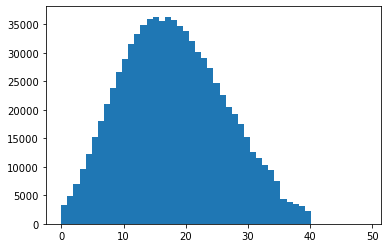

In [90]:
plt.hist(dti_no_outliers, bins=50)

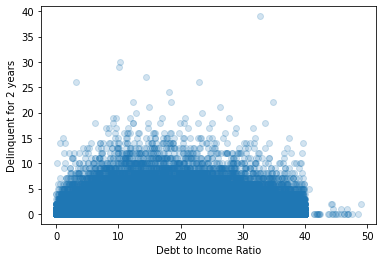

In [91]:
plt.scatter(x=dti_no_outliers, y=delinq_2yrs_no, alpha=0.2)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Delinquent for 2 years')
plt.show()

# It lookls like most of the 2 year delinquent borrowers have 40 or less dti.  
# But, it doesn't seem to make a big difference whether the person has 0 dti or 40 dti.

In [92]:
# Exploring the loan status column. It is categorical.

loan_status_dti = Loan_0715.groupby('loan_status')['dti'].median()

In [93]:
loan_status_dti

loan_status
Charged Off           18.270
Current               18.150
Default               19.700
Fully Paid            15.710
In Grace Period       19.200
Issued                16.885
Late (16-30 days)     18.880
Late (31-120 days)    19.485
Name: dti, dtype: float64

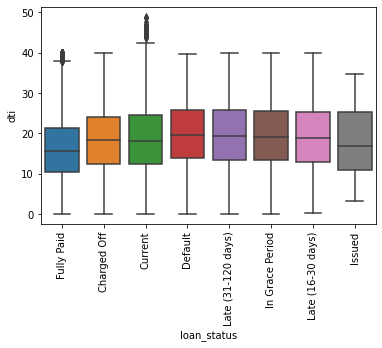

In [94]:
# I will do this plot after excluding the extreme value in current.
_ = sns.boxplot(x='loan_status', y='dti', data=outliers_removed)
plt.xticks(rotation=90)
plt.show()

# The box plot doesn't show significant difference in dti's between the different loan_status categories.

In [95]:
# I am not seening much of a pattern or correlation when I consider the whole data.

# I am now selecting the borrowers whose loan status is not good in order to explore any patterns in those records.

df_bad_status = Loan_0715[Loan_0715['loan_status'].isin(['Charged Off', 'Default', 'Late (16-30 days)', 'Late (31-120 days)'])]

In [96]:
df_bad_status.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,3,C4,0.0,...,435.17,0.00,117.08,1.1100,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0
8,1071795,5600.0,5600.0,5600.0,60,21.28,152.39,6,F2,4.0,...,294.94,0.00,189.06,2.0900,Apr-2012,152.39,Aug-2012,0.0,INDIVIDUAL,0.0
9,1071570,5375.0,5375.0,5350.0,60,12.69,121.45,2,B5,0.0,...,533.42,0.00,269.29,2.5200,Nov-2012,121.45,Mar-2013,0.0,INDIVIDUAL,0.0
12,1064687,9000.0,9000.0,9000.0,36,13.49,305.38,3,C1,0.0,...,570.26,0.00,444.30,4.1600,Jul-2012,305.38,Nov-2012,0.0,INDIVIDUAL,0.0
14,1069057,10000.0,10000.0,10000.0,36,10.65,325.74,2,B2,3.0,...,1393.42,0.00,645.10,6.3145,Oct-2013,325.74,Mar-2014,0.0,INDIVIDUAL,0.0
21,1039153,21000.0,21000.0,21000.0,36,12.42,701.73,2,B4,10.0,...,3330.44,0.00,0.00,0.0000,Sep-2013,701.73,Jan-2016,0.0,INDIVIDUAL,0.0
24,1069559,6000.0,6000.0,6000.0,36,11.71,198.46,2,B3,1.0,...,475.25,0.00,269.31,2.5700,Oct-2012,198.46,Mar-2013,0.0,INDIVIDUAL,0.0
27,1069657,5000.0,5000.0,5000.0,60,16.77,123.65,4,D2,2.0,...,719.11,0.00,260.96,2.3000,Dec-2012,123.65,May-2013,0.0,INDIVIDUAL,0.0
46,1069465,5000.0,5000.0,5000.0,36,8.90,158.77,1,A5,10.0,...,696.99,0.00,107.00,1.0700,Aug-2014,158.77,Dec-2014,0.0,INDIVIDUAL,0.0
50,1069248,15000.0,15000.0,15000.0,36,9.91,483.38,2,B1,8.0,...,2374.34,24.17,222.81,36.3708,Oct-2014,483.38,Mar-2015,0.0,INDIVIDUAL,0.0


In [97]:
df_bad_status.shape

(56956, 44)

In [98]:
# Comparing the interst rate of the borrowers who are in bad status versus the interest rate of all borrowers.

print(df_bad_status['int_rate'].mean())
print(df_bad_status['int_rate'].median())
print(df_bad_status['int_rate'].std())
print(np.percentile(df_bad_status['int_rate'], (5, 25, 50, 75, 95)))

16.023882470677265
15.62
4.292283694778584
[ 8.9  13.05 15.62 18.85 23.76]


In [99]:
# Summary statistics of interest rate for the whole data.

print(Loan_0715['int_rate'].mean())
print(Loan_0715['int_rate'].median())
print(Loan_0715['int_rate'].std())
print(np.percentile(Loan_0715['int_rate'], (5, 25, 50, 75, 95)))

13.258476659742353
12.99
4.385938009214532
[ 6.62  9.99 12.99 16.2  20.99]


In [100]:
# It looks like those borrowers with higher interest rate are ending up being in bad status with their loan. 
# It seems like high interest rate may have contribution to their struggle to pay their loan.

In [101]:
# Comparing the debt-to-income ratio of the borrowers who are in bad status versus the interest rate of all borrowers.

print(df_bad_status['dti'].mean())
print(df_bad_status['dti'].median())
print(df_bad_status['dti'].std())
print(np.percentile(df_bad_status['dti'], (5, 25, 50, 75, 95)))

18.644575286185933
18.53
8.052836625668668
[ 5.49   12.72   18.53   24.38   32.2725]


In [102]:
# Summary statistics of interest rate for the whole data.

print(Loan_0715['dti'].mean())
print(Loan_0715['dti'].median())
print(Loan_0715['dti'].std())
print(np.percentile(Loan_0715['dti'], (5, 25, 50, 75, 95)))

18.036753557315027
17.56
8.263914094221507
[ 5.19 11.86 17.56 23.8  32.55]


In [103]:
# Those customers with loan's in bad status seem to have a little bit higher dti than the dti for the whole data.

In [104]:
# Comparing the employment length of the borrowers who are in bad status versus the interest rate of all borrowers.

print(df_bad_status['emp_length'].mean())
print(df_bad_status['emp_length'].median())
print(df_bad_status['emp_length'].std())
print(np.percentile(df_bad_status['emp_length'], (5, 25, 50, 75, 95)))

5.795737060186811
6.0
3.6353293434941483
[ 0.  2.  6. 10. 10.]


In [105]:
# Summary statistics of interest rate for the whole data.

print(Loan_0715['emp_length'].mean())
print(Loan_0715['emp_length'].median())
print(Loan_0715['emp_length'].std())
print(np.percentile(Loan_0715['emp_length'], (5, 25, 50, 75, 95)))

6.011639260456315
6.0
3.664008529313139
[ 0.  3.  6. 10. 10.]


In [106]:
# There is not much a difference in employment length between those in bad loan status versus the whole data.

In [107]:
# Comparing the annual income of the borrowers who are in bad status versus the interest rate of all borrowers.

print(df_bad_status['annual_inc'].mean())
print(df_bad_status['annual_inc'].median())
print(df_bad_status['annual_inc'].std())
print(np.percentile(df_bad_status['annual_inc'], (5, 25, 50, 75, 95)))

67685.49422097759
59000.0
55876.76403731984
[ 27000.  42000.  59000.  80000. 137000.]


In [108]:
# Summary statistics of interest rate for the whole data.

print(Loan_0715['annual_inc'].mean())
print(Loan_0715['annual_inc'].median())
print(Loan_0715['annual_inc'].std())
print(np.percentile(Loan_0715['annual_inc'], (5, 25, 50, 75, 95)))

76269.33895958979
65000.0
65357.14890015482
[ 30000.  47000.  65000.  90000. 152000.]


In [109]:
# It looks like those with bad loan status have lower annual income compared to the annual income for the whole data.

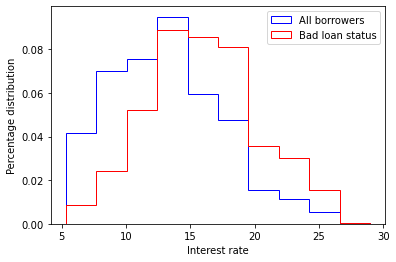

In [110]:
# Comparing interest rate distribution for all borrowers versus those with bad loan status.

_ = plt.hist(Loan_0715['int_rate'], histtype='step', density = True, color='blue', label='All borrowers')
_ = plt.hist(df_bad_status['int_rate'], histtype='step', density = True, color='red', label='Bad loan status')
_ = plt.xlabel('Interest rate')
_ = plt.ylabel('Percentage distribution')
plt.legend()

plt.show()

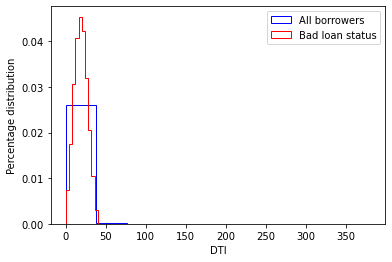

In [111]:
# I will do this plot after excluding the extreme value in current.
_ = plt.hist(Loan_0715['dti'], histtype='step', density = True, color='blue', label='All borrowers')
_ = plt.hist(df_bad_status['dti'], histtype='step', density = True, color='red', label='Bad loan status')
_ = plt.xlabel('DTI')
_ = plt.ylabel('Percentage distribution')
plt.legend()

plt.show()

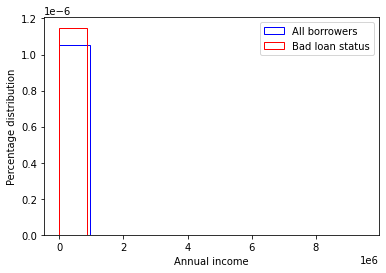

In [112]:
# I will do this plot after excluding the extreme value in current.
_ = plt.hist(Loan_0715['annual_inc'], histtype='step', density = True, color='blue', label='All borrowers')
_ = plt.hist(df_bad_status['annual_inc'], histtype='step', density = True, color='red', label='Bad loan status')
_ = plt.xlabel('Annual income')
_ = plt.ylabel('Percentage distribution')
plt.legend()

plt.show()

In [113]:
Loan_0715.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,2,B2,10.0,...,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,INDIVIDUAL,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,3,C4,0.0,...,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,3,C5,10.0,...,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,INDIVIDUAL,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,3,C1,10.0,...,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,INDIVIDUAL,0.0
4,1075358,3000.0,3000.0,3000.0,60,12.69,67.79,2,B5,1.0,...,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,INDIVIDUAL,0.0


In [114]:
Loan_0715.to_csv('Loan_0715_after_eda.csv',index=False)

In [ ]:
# To further explore

# Patterns in data for those who are in bad loan status versus:

   # interest rate
   # dti
   # annual income
    
